## Monte-Carlo Simulation of Prey-Predator Dynamics

#### Author: Souradeep Sengupta, PhD'20, Dept. of Physics, Ashoka University, Sonipat, Haryana - 131029

### Introduction 
 
 A defining question in the field of population ecology is regarding the fundamental nature of prey-predator dynamics - are they naturally self-annihilating, or do they tend towards some sort of self-limiting equilibrium? In nature, we see examples of ecosystems which show sustainable equilibria of varying degrees of intricacy - what mechanism lies behind it? And what is the role played by the environment itself in facilitating or inhibiting this equilibrium?
 
An [influential antecedent study by Georgy Gause](https://books.google.co.in/books?id=v01OToAhJboC&printsec=frontcover&redir_esc=y), as recounted in the book Struggle for Survival, had suggested that closed prey-predator systems are doomed to self-annihilate. That unless specific sanctuaries for the prey are created where the predators cannot enter, or unless there is periodic migration of prey into the system, any such system is doomed to over-exploitation (predator eats too much of prey) and mutual annihilation (prey population is wiped out, and eventually predators die out from lack of food too). While this makes an instinctive sort of sense, and is borne out by laboratory experiments, we see many counter-examples in nature, where prey-predator systems are able to sustain themselves infinitely. How is this happening? To borrow a phrase from the field of economics, how exactly does the "invisible hand of Mother Nature" work? 
 
To shed light on this problem, Carl B. Huffaker, an ecologist and agricultural entomologist at the University of California, Berkeley, [did a series of experiments using two species of prey and predatory mites](http://hilgardia.ucanr.edu/Abstract/?a=hilg.v27n14p343) with one singular goal: is it possible to create a model environment in the lab where the prey and predator do not mutually annihilate and exist in equilibrium, at least for a statistically significant period of time? The answer turns out to be that yes, we can! And the key to this sustainability is the idea of spatial heterogeneity or complexity - we must abandon our naive assumptions of mass balance and homogenous mixing of populations, but focus on discrete agglomerates of prey and predator populations, where the predators are constantly in search of the prey, and the prey themselves are often on the move. Dispersal and the difficulty of searching (as functions of the environment) turn out to be the important driving factor in helping prey and predator co-exist.

Inspired by the spirit of Huffaker's ingenious and meticulous experiment, we shall try to create a mathematical model of this kind of self-sustaining model and try to simulate its evolution using a Monte-Carlo algorithm. 

### Description of the Model 

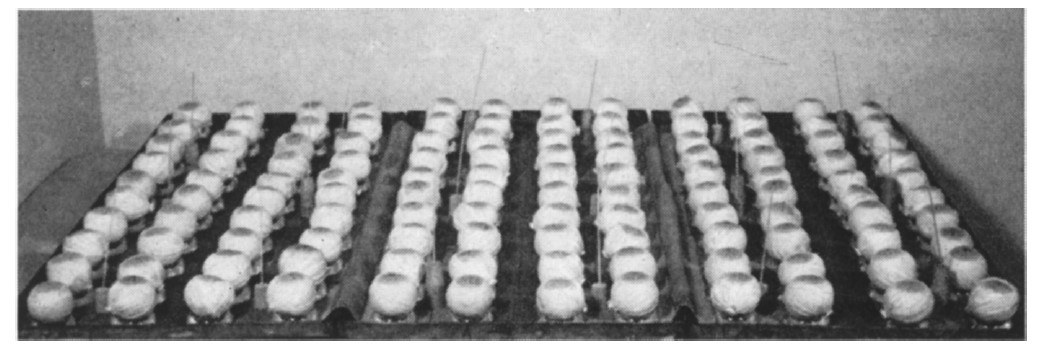

The basic structure of Huffaker's experiment was this - he had a collection of oranges set out on rectangular grids of various sizes, most importantly one with 120 oranges on a 10x12 grid, and in other cases, oranges dispersed amongst orange balls to make it harder for a predator to detect the prey. On a fixed number of these oranges, he released about 20 of the herbivorous mites *E. sexmaculatus*, which tend to condition (or eat up) the orange in about three weeks or 20 days, necessitating dispersal of the mites to nearby sources of food, i.e. other oranges. The oranges themselves were replaced by the experimentalists every 45 days or so. The combination of resource overexploitation and resource replenishment is characteristic of nature as well, and ensures that the prey will always have food, but will have to move around the system for it, thus making it a harder target for the predators. To make the movement of the prey mites easier, sticks were placed next to the oranges and a gentle wind blew through the system to allow the mites to float from one orange to the other, while Vaseline barriers were placed in the paths of the predators on the ground. 

After about ten days of the first introduction of the prey, on one of the colonised oranges, 2 predatory mites of the species *T. occidentalis* were released - these mites are ravenous predators of the *E. sexmaculatus*. Once they find the prey on any orange, they will completely decimate the prey population (overexploitation). After that they will migrate in search of food, and die out if no other prey can be found.

So the behaviour of our agents can be summarised as follows:
1. Prey mites overexploit the orange on any site till it reaches some sort of saturation value (which is the fixed point of the logistic equation). After that, various proportions of the population start to migrate to other sources of food nearby over time. Due to the plentiful supply of oranges, they never die out from lack of resources, but simply have to move about every few days. 

2. Predator mites also overexploit the prey on any populated orange they find, until the prey are all dead on that site. Following that, they will start to die out unless they can migrate and find another populated orange. 

**We will focus on a model universe with 40 oranges, on a 4x10 grid, with 20 prey mites each on two randomly selected oranges, and then 2 predator mites dropped on one of these oranges 10 days after the beginning of the experiment. We expose only a part of the oranges to *E. sexmaculatus* consumption, so as to ensure overexploitation of the orange and therefore gradual migration of the mites within 10 days.** 

Mathematically, a prey-predator system is usually modelled as a (discrete time) Markovian stochastic process. This means that the evolution of the state of the system is somewhat random and depends only on the current state at the time, i.e. it is history- (or path-) independent. (We have also made the choice to consider a discrete time model because it makes more sense while analysing a population ecology experiment where the data is necessarily discrete in time.) As such, these systems are most generally described by a Kolmogorov model and a master equation which details the flow of probabilities of the system existing in various states.

An example of a Kolmogorov model is the Lotka-Volterra prey-predator equations. In [a somewhat basic form](https://bbolker.github.io/math3mb/labNotes/lotkavolterra.pdf), they are represented as

\begin{align}
    P_{t+1} &= d P_t + caP_t N_t\\
    N_{t+1} &= r N_t(1-N_t/K) - aP_t N_t
\end{align}

Here, $P_t, N_t$ are the populations of the predator and prey at time $t$. We have made the assumption that in the absence of predation, the prey population follows a logistic growth model, rather than an exponential growth model. This makes sense because, as we also see in the Huffaker experiment, the population size of the prey is limited by how much edible orange there is at any point of time. If predators are present, then $a$ signifies the predation rate, and the *E. sexmaculatus* mites die out at the rate of $aP_t N_t$, i.e. the rate is density-dependent. The more the prey and predators, the higher the rate of predation. While for the predators, in the absence of prey, their survival rate is $d$ - and in the presence of prey, their food is converted with the efficiency of $c$ into offspring. 

This is the deterministic part of our model - the stochastic part relates to dispersal/migration and searching. We assume that the predators upon running out of prey on any particular orange, do a random walk amongst the nearby oranges and keep searching until they either die out, or find a populated orange. A key factor we are introducing is that movement and searching is difficult for the predator and takes time to move out of any sub-zone. 

On the other hand, because the prey can float to other oranges on the breeze, we put in a Gaussian weighted probability distribution for which orange site to migrate to, with closer sites favoured, but farther sites also possible. We normalize the probability distribution such that it has finite support, i.e. the probabilities for all 40 sites combined add up to 1. 

The algorithm we follow can be best summarised as follows: 

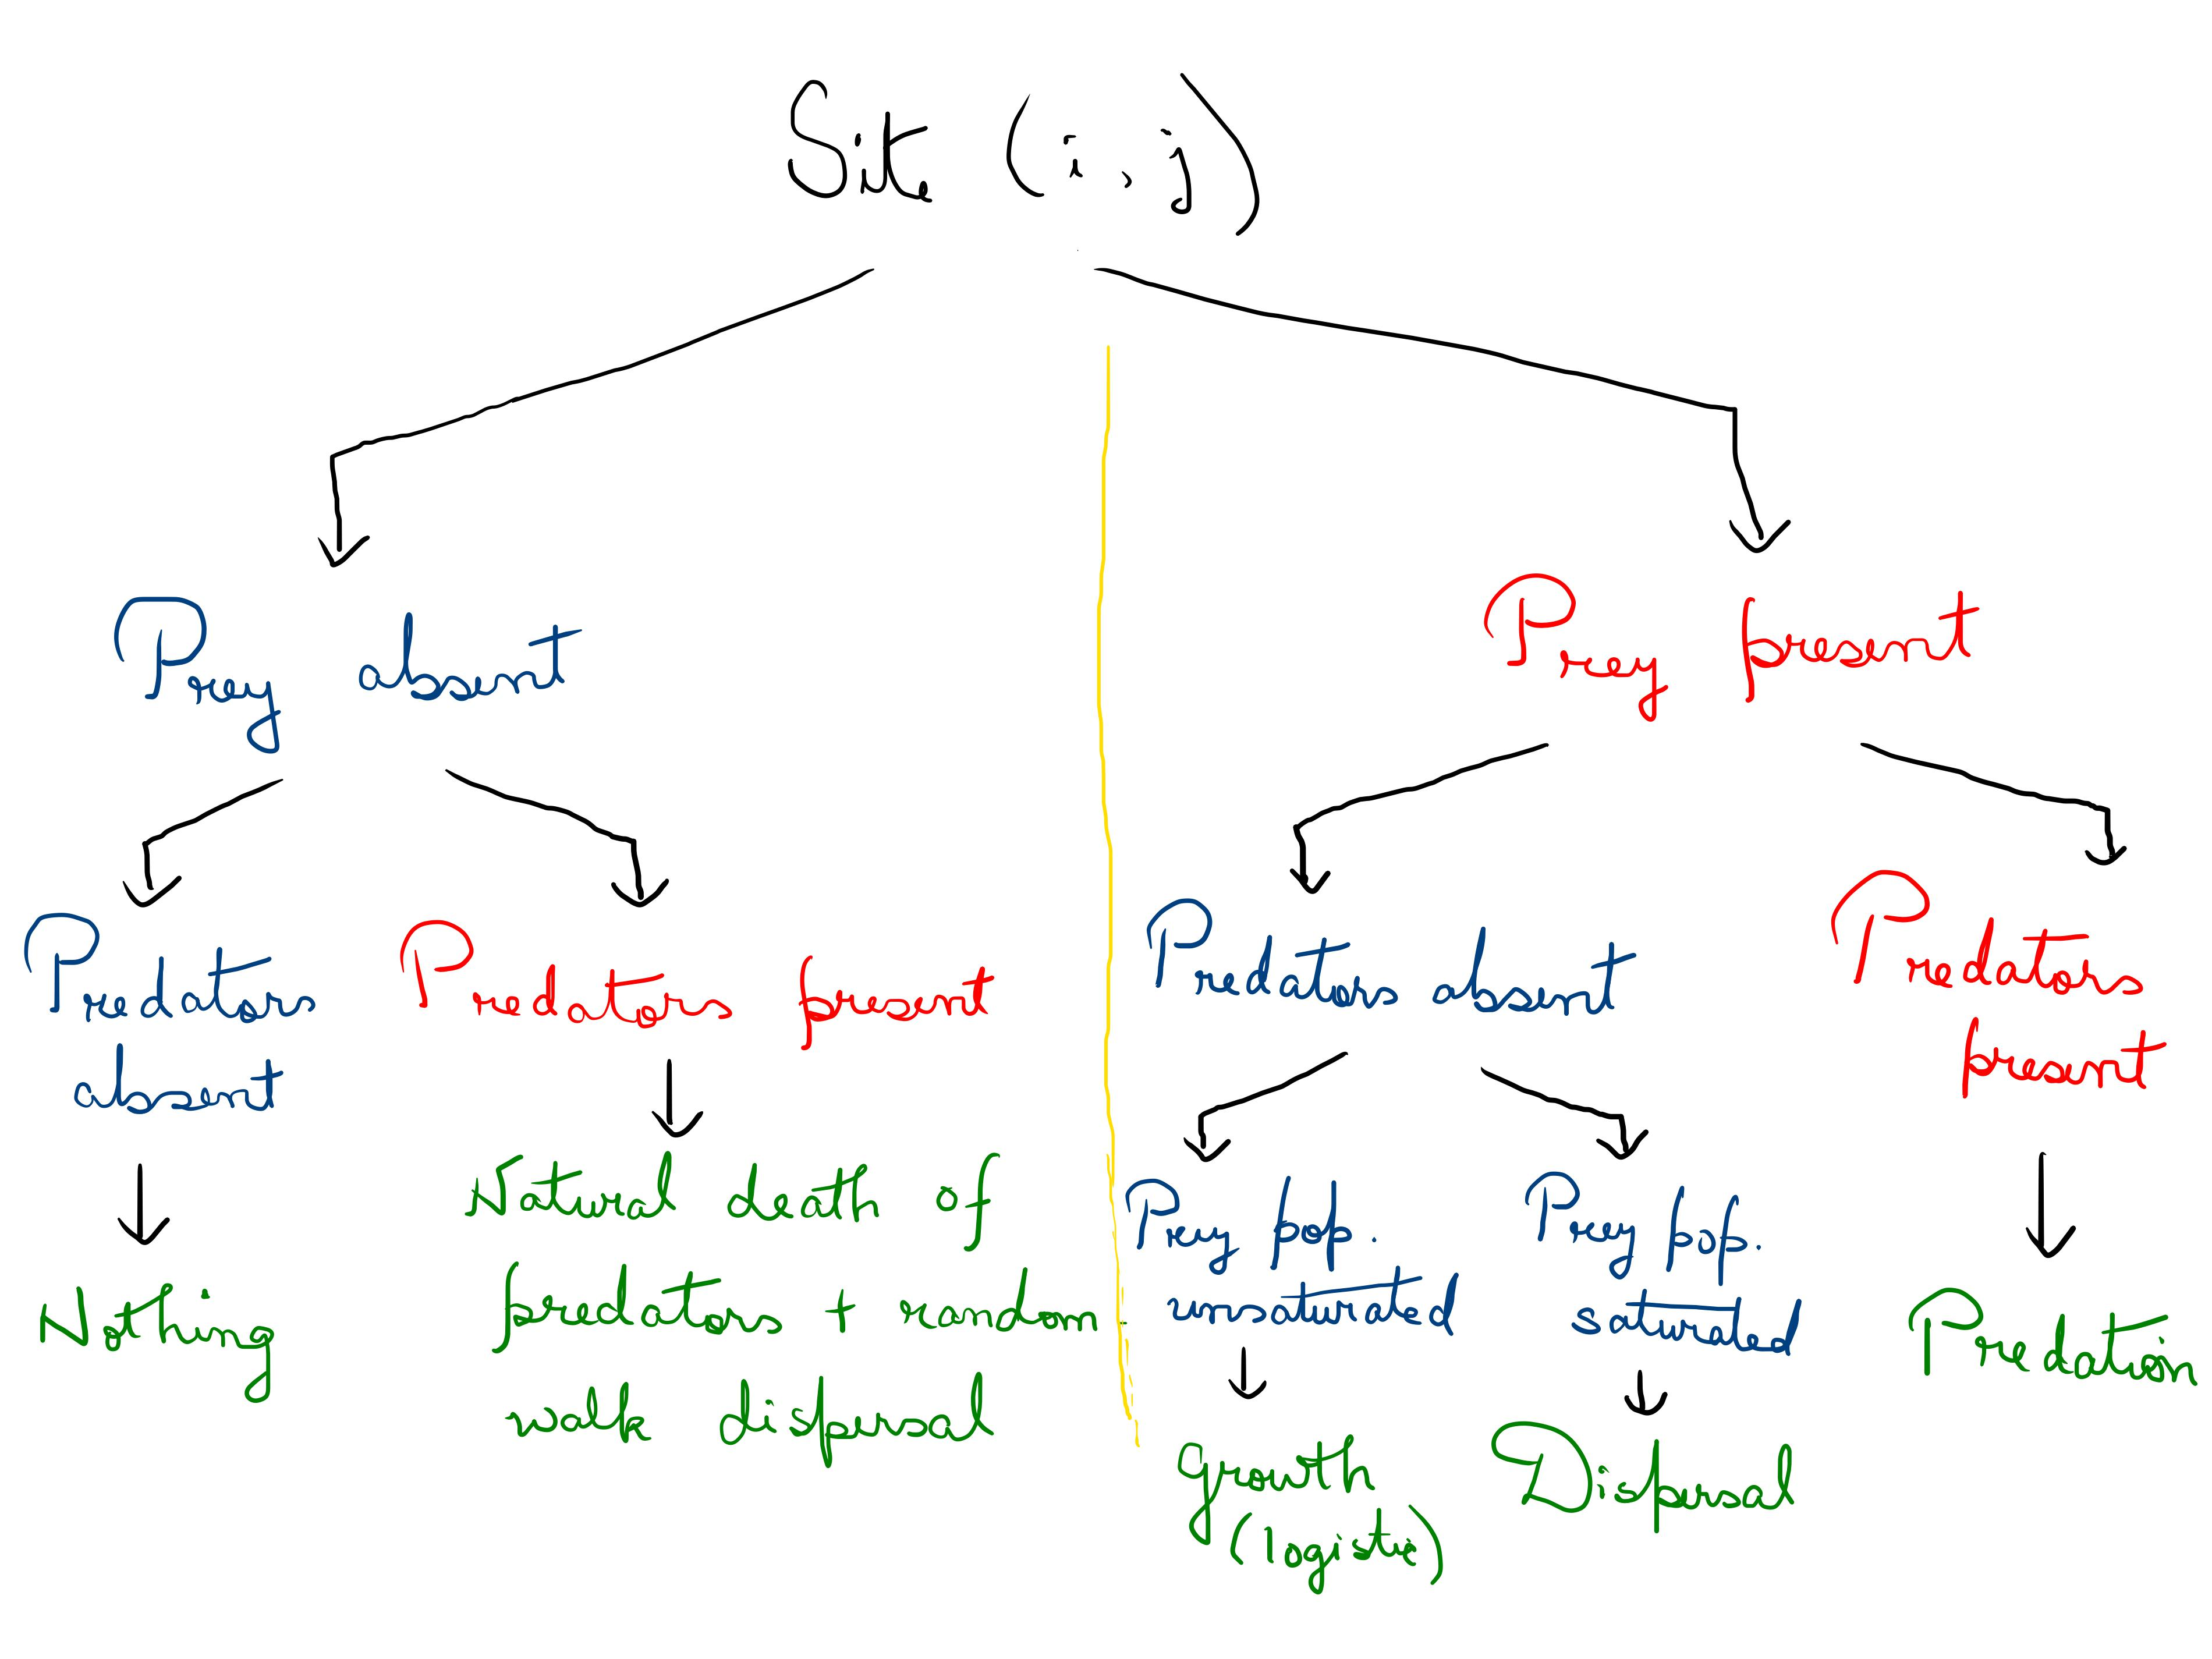

### Methods and Materials

We import the necessary libraries to run our code. We use pseudo-random number generators from the **NumPy** module. We also import the Celluloid module to enable an animation of the 4x10 grid. 

In [2]:
%matplotlib inline
import celluloid
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import numpy as np
import numba
from numba import jit, njit
from celluloid import Camera
import ffmpeg
from numpy.random import randint, random, choice
from IPython.display import HTML
from matplotlib.colors import LogNorm
from matplotlib import cm

This is what a representative sample of the grid looks like, with each position filled by the number of (say) prey mites on each site. We have also printed an array with all the population values below the graph. We put predator population grid in $P$ and prey population grid in $N$.

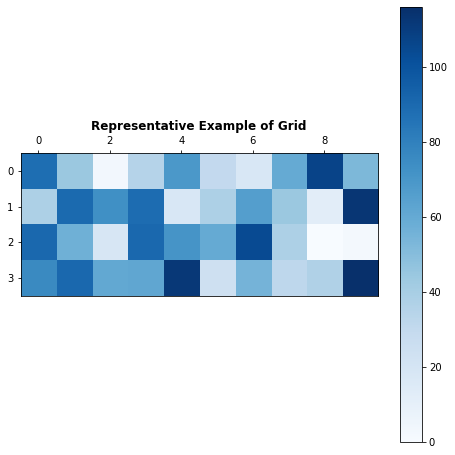

[[ 88  44   3  35  69  30  18  60 107  53]
 [ 38  90  73  89  18  38  66  44  12 113]
 [ 91  57  19  91  71  60 104  38   0   2]
 [ 76  91  61  62 112  24  55  32  37 116]]
Total population over the whole grid is  2287


In [468]:
fig, ax=plt.subplots(figsize=(8, 8))
random_data = np.random.randint(120, size=(4, 10))
example=ax.imshow(random_data, cmap ="Blues", interpolation ='nearest',
                               alpha = 1)
ax.xaxis.set_ticks_position('top')  
plt.colorbar(example)
ax.set_title('Representative Example of Grid', fontweight ="bold")
plt.show()
print(random_data)
print("Total population over the whole grid is ", np.sum(random_data))

Initially we randomly pick any two sites, and fill those with twenty mites each. This looks like the following. 

We also pick one of the two sites $(i_1, j_1)$ to put 2 predatory mites into.

The L array is just a 4x10 grid with each element being the $(i,j)$ index value of the element. We shall need it later while picking which sites to migrate to. 

Prey are put on the sites ('2', '7') ('3', '4') at the beginning.
Predators will come in on the site ('2', '7') after 10 days


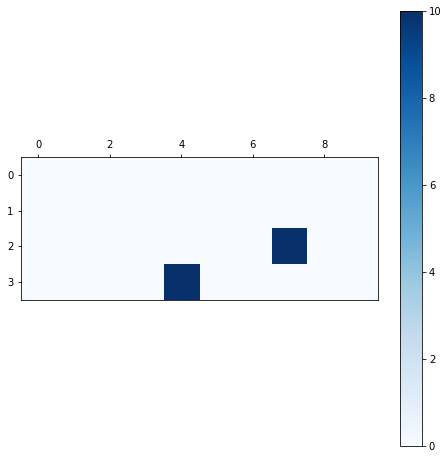

List A is [[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9]]


In [465]:
np.random.seed(42)
P, N=np.zeros((4, 10)), np.zeros((4,10))
i=randint(4, size=2)
j=randint(10, size=2)
i1, j1=i[0], j[0]
print("Prey are put on the sites", (str(i[0]), str(j[0])), (str(i[1]), str(j[1])), "at the beginning.")
print("Predators will come in on the site", (str(i1), str(j1)), "after 10 days")
N[i[0]][j[0]], N[i[1]][j[1]]=10, 10
fig, ax=plt.subplots(figsize=(8,8))
c=ax.imshow(N, cmap ="Blues", interpolation ='nearest',
                               alpha = 1)  
ax.xaxis.set_ticks_position('top')  
plt.colorbar(c)
plt.show()
L=np.zeros((4, 10))
L=[[a, b] for a in range(4) for b in range(10)]
print("List A is", L)

We define the functions associated with the Lotka-Volterra equations. $f_1$ is logistic growth of prey in the absence of predators, $f_2$ is the change in prey population in the presence of predators, $g_1$ shows the natural deaths and survival rate of predators in the absence of prey, $g_2$ is the change in the predator population when they have access to food (i.e. prey). 

Also pred_jump is a function that stochastically generates the position to which predators migrate (due to lack of prey) if they start from the site $(i,j)$. Point to note is we have to take care that the predators do not leave the 4x10 grid. 

Similarly, prey_jump is a function that stochastically generates the position to which prey migrate (due to overexploitation of orange) if they start from the site $(i,j)$.

In [295]:
def f1(x, y): return r*x*(1-x/K)
def f2(x, y): return f1(x, y) - (a*x*y)
def g1(x, y): return d*y
def g2(x, y): return g1(x, y) + (c*a*x*y)

#d is survival rate of predator, r growth rate of prey, c is food-to-offspring efficiency of predator, a is rate of predation
#x is prey, y is predator

@njit
def pred_jump(i, j): 
    deltas = [(1,0), (0,1), (-1,0), (0,-1)] #these are the increments
    deltas_feasible = [] #these store the list with all the feasible increments for predator migration
    for dx, dy in deltas:
        if ((i+dx)>=0 and (i+dx)<4) and ((j+dy)>=0 and (j+dy)<10):  
            deltas_feasible.append((dx,dy))
    dx, dy = deltas_feasible[randint(0,len(deltas_feasible))]
    return (i+dx, j+dy)

def prey_jump(i, j):
    probs=np.zeros((4,10))
    for x in range(4):
        for y in range(10):
            if (x==i) and (y==j):
                probs[x][y]=0
            else:
                distance=np.sqrt((i-x)**2 + (j-y)**2)
                probs[x][y]=np.exp(-m*distance**2)
    tot=np.sum(probs)
    probs=[i/tot for i in probs]
    probs=np.reshape(probs, 40)
    pick=choice(a=np.arange(40), p=probs, size=None)
    new=L[pick]
    i, j=new[0], new[1]
    return (i, j)

The evol function is our main workhorse. This contains the algorithm sketched above. We go over every single site across the 4x10 grid, and evolve each of them based on how many predators and prey are present on the site. If there are too many prey and no predators, there is migration of prey. If there is both prey and predator, then there is predation. If there is predator and no prey, then there is migration of predators. If there are neither predators nor prey on a site, then nothing happens, and we move on to the next site. 

In [466]:
np.random.seed(42)
def evol(P, N, t):
    if t==t1:
        P[i1][j1]=2
    for i in range(4):
        for j in range(10):
            if N[i][j]>1:      #prey present
                if P[i][j]>0:  #predators present
                    N[i][j], P[i][j]=f2(N[i][j],P[i][j]), g2(N[i][j],P[i][j])
                    if N[i][j]<0:
                        N[i][j]=0
                if P[i][j]<1:  #predators absent
                    if N[i][j]< K*(1-1/r):  #unsaturated
                        N[i][j]=f1(N[i][j],P[i][j])
                    if N[i][j]>= K*(1-1/r): #saturated
                        mig2=random() #proportion of prey migrating due to overpopulation
                        N[i][j]=N[i][j]-mig2*N[i][j]
                        inew, jnew=prey_jump(i, j)
                        N[inew][jnew]=N[inew][jnew]+mig2*N[i][j]
                continue        
            elif N[i][j]<=1:      #prey absent
                if P[i][j]>1:  #predators present
                    P[i][j]=g1(N[i][j], P[i][j])
                    mig1=random() #proportion of predators migrating due to prey scarcity
                    P[i][j]=P[i][j]-mig1*P[i][j]
                    inew, jnew=pred_jump(i, j)
                    P[inew][jnew]=P[inew][jnew]+mig1*P[i][j]
    return (P, N)

### Results and Discussions

In this section, we will finally do a plot of predator and prey populations, starting from two oranges occupied by 10 prey mites each, and then being joined by 2 predator mites, and see how the total population of either species varies over time. Do we see the oscillations as predicted by Huffaker, or does the system move inexorably towards collapse/mutual extinction?

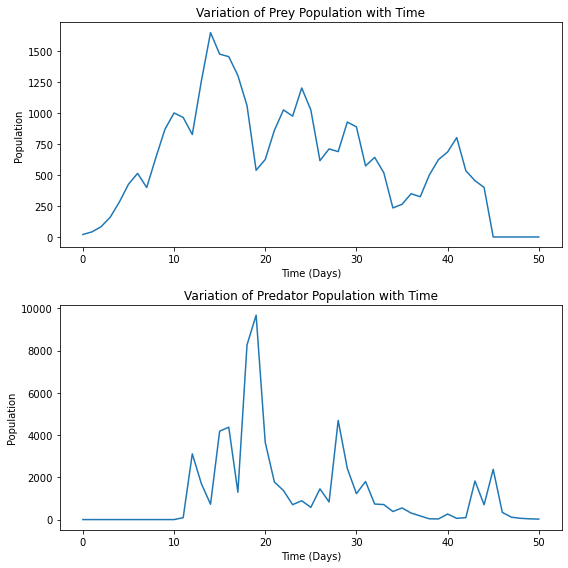

In [467]:
np.random.seed(42)
iters=50
m, t1, r, K, a, c, d=0.05, 10, 2.1, 500, 0.2, 1, 0.6

stuff1, stuff2=[np.sum(P)], [np.sum(N)]
for t in range(iters):
    P, N=evol(P, N, t)
    stuff1.append(np.sum(P))
    stuff2.append(np.sum(N))
times=range(iters+1)
fig, (ax1, ax2)=plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
ax1.plot(times, stuff2)
ax1.set_title("Variation of Prey Population with Time")
ax1.set_xlabel("Time (Days)")
ax1.set_ylabel("Population")
ax2.plot(times, stuff1)
ax2.set_title("Variation of Predator Population with Time")
ax2.set_xlabel("Time (Days)")
ax2.set_ylabel("Population")
plt.tight_layout()
plt.savefig("Huffaker Experiment 1")

As in Huffaker's experiment, we see a number of oscillations in both predator and prey populations, with the predator population graph slightly time-delayed as compared to the prey population, as we expect. Comparing with Huffaker's actual data for a 10x12 grid all filled by oranges and where all the orange sites were initially seeded by a few prey and later a few predator mites, we can see the resemblance.

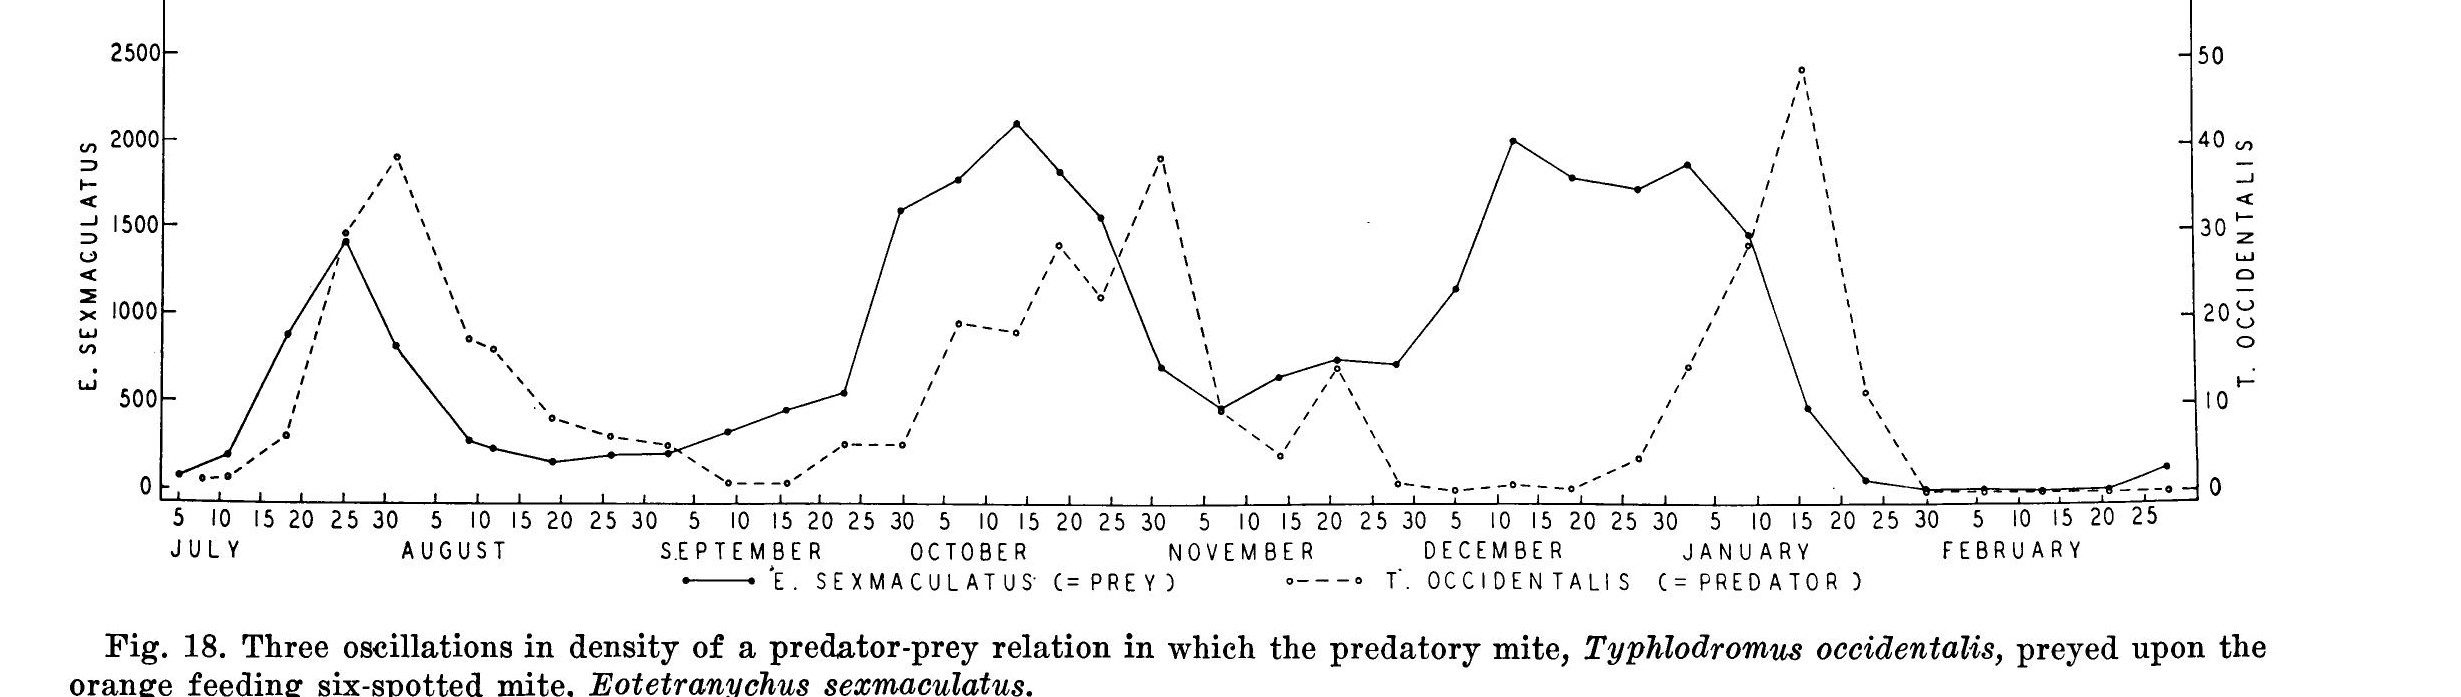

The differences are primarily that we have significantly more number of predatory mites, and also that their system is stable over a much longer period. But by picking more appropriate values for the system parameters ($r, K, a, c, d$), it is to be hoped that we can get results of even higher fidelity with respect to Huffaker's experimental data. It is also to be noted that we are working with a 4x10 grid, to minimise our computational load, whereas Huffaker worked with a 10x12 grid, which due to its larger size and complexity, might be inherently a more stable system. 

### Implications

The results we have arrived at are quite remarkable. Starting from a simple deterministic Lotka-Volterra system and modifying it with elements of stochastic dispersal using an original algorithm we devised, we have managed to reproduce, to a reasonable degree, the results of a highly complex landmark experimental study in population ecology.

Because computational simulations take much less time and resources, this program, with appropriate parameter estimation, can be used for feasibility studies before any actual laboratory experiment is done. It can also help fine-tune the design of the experiment and streamline the entire process. 

Two future directions of study are:

1. To create an animation of the population grids as they evolve.
2. To redo the simulations for all the different universes, and especially the 10x12 grid, that Huffaker used. 
3. See if the basic structure of the program is also suitable for other famous experiments in population ecology, and perhaps also to motivate or inspire new ones. 